<h1> PTRAIL Filters </h1>
<p>
    This Jupyter Notebook contains several examples of filtering
    functions like filtering the data based on time, date,
    proximity to a point etc.
    <br>
    <br>
    Apart from filtering, this Jupyter
    Notebook also has examples of outlier detection and removal
    from the dataset.
</p>

<hr>

<p align='justify'>
    This Jupyter Notebook contains Dataset filtering examples and
    the following datasets are used to demonstrate them:
    <ul>
        <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/geolife_sample.csv"> Geolife Sample </a> </li>
        <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/gulls.csv"> Seagulls Dataset </a> </li>
        <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/atlantic.csv"> Hurricane Dataset </a> </li>
    </ul>
</p>

<hr>
<p align='justify'>
Note: Viewing this notebook in GitHub will not render JavaScript
elements. Hence, for a better experience, click the link below
to open the Jupyter notebook in NB viewer.

<span> &#8618; </span>
<a href="https://nbviewer.jupyter.org/github/YakshHaranwala/PTRAIL/blob/main/examples/3.%20filter_examples.ipynb" target='_blank'> Click Here </a>
</p>

In [1]:
import numpy as np

from ptrail.core.TrajectoryDF import PTRAILDataFrame
from ptrail.features.kinematic_features import KinematicFeatures as spatial
from ptrail.features.temporal_features import TemporalFeatures as temporal
from ptrail.preprocessing.filters import Filters as filters
import ptrail.utilities.constants as const

import pandas as pd
import time
import matplotlib.pyplot as plt
np.seterr(invalid='ignore')
start = time.time()

In [2]:
%%time
"""
    First of all, lets import all the datasets one by one
    and check out a few of their points.
"""
# Reading the geolife dataset and converting to PTRAILDataFrame.
# Also, lets, print the first 5 points of the datset to
# see how the dataframe looks.
geolife = pd.read_csv('https://raw.githubusercontent.com/YakshHaranwala/PTRAIL/main/examples/data/geolife_sample.csv')
geolife = PTRAILDataFrame(geolife,'lat','lon','datetime','id')
geolife.head()

CPU times: user 450 ms, sys: 69.6 ms, total: 519 ms
Wall time: 1.13 s


lat         lon
traj_id DateTime                                  
1       2008-10-23 05:53:11  39.984224  116.319402
        2008-10-23 05:53:16  39.984211  116.319389
        2008-10-23 05:53:21  39.984217  116.319422
        2008-10-23 05:53:23  39.984710  116.319865
        2008-10-23 05:53:28  39.984674  116.319810

In [3]:
%%time

# Reading the gulls dataset and converting to PTRAILDataFrame.
# Also, lets, print the first 5 points of the datset to
# see how the dataframe looks.
gulls = pd.read_csv('https://raw.githubusercontent.com/YakshHaranwala/PTRAIL/main/examples/data/seagulls.csv')
gulls = PTRAILDataFrame(gulls,
                        latitude='lat',
                        longitude='lon',
                        datetime='DateTime',
                        traj_id='traj_id',
                        rest_of_columns=[])
gulls.head()

CPU times: user 255 ms, sys: 72.2 ms, total: 328 ms
Wall time: 1.04 s


event-id  visible       lon       lat  \
traj_id DateTime                                                       
91732   2009-05-27 14:00:00  1082620685     True  24.58617  61.24783   
        2009-05-27 20:00:00  1082620686     True  24.58217  61.23267   
        2009-05-28 05:00:00  1082620687     True  24.53133  61.18833   
        2009-05-28 08:00:00  1082620688     True  24.58200  61.23283   
        2009-05-28 14:00:00  1082620689     True  24.58250  61.23267   

                            sensor-type individual-taxon-canonical-name  \
traj_id DateTime                                                          
91732   2009-05-27 14:00:00         gps                    Larus fuscus   
        2009-05-27 20:00:00         gps                    Larus fuscus   
        2009-05-28 05:00:00         gps                    Larus fuscus   
        2009-05-28 08:00:00         gps                    Larus fuscus   
        2009-05-28 14:00:00         gps                    Larus fuscus   

                            individual-local-identifier  \
traj_id DateTime                                          
91732   2009-05-27 14:00:00                      91732A   
        2009-05-27 20:00:00                      91732A   
        2009-05-28 05:00:00                      91732A   
        2009-05-28 08:00:00                      91732A   
        2009-05-28 14:00:00                      91732A   

                                                                    study-name  
traj_id DateTime                                                                
91732   2009-05-27 14:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-27 20:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 05:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 08:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 14:00:00  Navigation experiments in lesser black-backed ...

In [4]:
%%time
'''
    1. Reading the atlantic dataset, cleaning it up and then
       converting it to PTRAILDataFrame.
    2. It is to be noted that apart from reading the dataset,
       before converting to PTRAILDataFrame, the dataframe needs
       some cleanup as the Time format provided in the dataframe
       needs to be first converted into a library supported time
       format. Also, the format of the coordinates need to be
       converted to library supported format before converting'
       it to PTRAILDataFrame.
    3. Also, lets, print the first 5 points of the dataset to
      see how the dataframe looks.
'''
atlantic = pd.read_csv('https://raw.githubusercontent.com/YakshHaranwala/PTRAIL/main/examples/data/atlantic_hurricanes.csv')
atlantic = PTRAILDataFrame(atlantic,
                          latitude='lat',
                          longitude='lon',
                          datetime='DateTime',
                          traj_id='traj_id',
                          rest_of_columns=[])
atlantic = temporal.create_date_column(atlantic)
atlantic.head()


CPU times: user 200 ms, sys: 33 ms, total: 233 ms
Wall time: 872 ms


Name        Date  Time Event  \
traj_id  DateTime                                                           
AL011851 1851-06-25 00:00:00              UNNAMED  1851-06-25     0         
         1851-06-25 06:00:00              UNNAMED  1851-06-25   600         
         1851-06-25 12:00:00              UNNAMED  1851-06-25  1200         
         1851-06-25 18:00:00              UNNAMED  1851-06-25  1800         
         1851-06-25 21:00:00              UNNAMED  1851-06-25  2100     L   

                             Status   lat   lon  Maximum Wind  \
traj_id  DateTime                                               
AL011851 1851-06-25 00:00:00     HU  28.0 -94.8            80   
         1851-06-25 06:00:00     HU  28.0 -95.4            80   
         1851-06-25 12:00:00     HU  28.0 -96.0            80   
         1851-06-25 18:00:00     HU  28.1 -96.5            80   
         1851-06-25 21:00:00     HU  28.2 -96.8            80   

                              Minimum Pressure  Low Wind NE  ...  Low Wind SW  \
traj_id  DateTime                                            ...                
AL011851 1851-06-25 00:00:00              -999         -999  ...         -999   
         1851-06-25 06:00:00              -999         -999  ...         -999   
         1851-06-25 12:00:00              -999         -999  ...         -999   
         1851-06-25 18:00:00              -999         -999  ...         -999   
         1851-06-25 21:00:00              -999         -999  ...         -999   

                              Low Wind NW  Moderate Wind NE  Moderate Wind SE  \
traj_id  DateTime                                                               
AL011851 1851-06-25 00:00:00         -999              -999              -999   
         1851-06-25 06:00:00         -999              -999              -999   
         1851-06-25 12:00:00         -999              -999              -999   
         1851-06-25 18:00:00         -999              -999              -999   
         1851-06-25 21:00:00         -999              -999              -999   

                              Moderate Wind SW  Moderate Wind NW  \
traj_id  DateTime                                                  
AL011851 1851-06-25 00:00:00              -999              -999   
         1851-06-25 06:00:00              -999              -999   
         1851-06-25 12:00:00              -999              -999   
         1851-06-25 18:00:00              -999              -999   
         1851-06-25 21:00:00              -999              -999   

                              High Wind NE  High Wind SE  High Wind SW  \
traj_id  DateTime                                                        
AL011851 1851-06-25 00:00:00          -999          -999          -999   
         1851-06-25 06:00:00          -999          -999          -999   
         1851-06-25 12:00:00          -999          -999          -999   
         1851-06-25 18:00:00          -999          -999          -999   
         1851-06-25 21:00:00          -999          -999          -999   

                              High Wind NW  
traj_id  DateTime                           
AL011851 1851-06-25 00:00:00          -999  
         1851-06-25 06:00:00          -999  
         1851-06-25 12:00:00          -999  
         1851-06-25 18:00:00          -999  
         1851-06-25 21:00:00          -999  

[5 rows x 21 columns]

In [5]:
# %%time

#Now, let create a bounding box of 100 km radius from the
#coordinates 39, 116.

bbox = filters.get_bounding_box_by_radius(39, 116, 100000)
bbox

(38.100678394081264, 114.84275815636957, 39.89932160591873, 117.15724184363044)

In [6]:
# Now, lets filter the trajectory based on date. We will
# try all the possible combinations for the filtering.

small = filters.filter_by_date(atlantic, start_date='1851-06-25',end_date='2011-01-01')
print(f"Length of atlantic: {len(atlantic)}")
print(f"Length of small: {len(small)}")

Length of atlantic: 49105
Length of small: 46909


In [7]:
# Now, lets filter the trajectory based on datetime. We will
# try all the possible cases one by one.

tiny = filters.filter_by_datetime(atlantic, start_dateTime='1859-09-21 23:00:00' ,
                                  end_dateTime='2011-09-21 23:00:00')
print(f"Length of atlantic: {len(atlantic)}")
print(f"Length of tiny: {len(tiny)}")

Length of atlantic: 49105
Length of tiny: 46536


In [8]:
# Now, lets filter the dataframe based on maximum speed.

atlantic = spatial.create_speed_column(atlantic)
max_speed_filt_df = filters.filter_by_max_speed(atlantic, 10)
print(f"Length of atlantic: {len(atlantic)}")
print(f"Length of speed_filt_df: {len(max_speed_filt_df)}")

Length of atlantic: 49105
Length of speed_filt_df: 41358


In [9]:
# Now, lets filter the dataframe based on minimum speed.

min_speed_filt = filters.filter_by_min_speed(max_speed_filt_df, 5)
print(f"Length of speed_filt_df: {len(max_speed_filt_df)}")
print(f"Length of min_speed_filt: {len(min_speed_filt)}")

Length of speed_filt_df: 41358
Length of min_speed_filt: 20485


In [10]:
# Now, lets filter the dataframe based on minimum distance
# between consecutive points.

min_distance_filt = filters.filter_by_min_consecutive_distance(atlantic,
                                                               125000)
print(f"length of atlantic: {len(atlantic)}")
print(f"length of min_distance_filt: {len(min_distance_filt)}")

length of atlantic: 49105
length of min_distance_filt: 20584


In [11]:
# Now, lets filter the dataframe based on maximum distance
# between consecutive points.

max_distance_filt = filters.filter_by_max_consecutive_distance(min_distance_filt,
                                                               500000)
print(f"length of min_distance_filt: {len(min_distance_filt)}")
print(f"length of max_distance_filt: {len(max_distance_filt)}")

length of min_distance_filt: 20584
length of max_distance_filt: 20412


In [12]:
# Now, lets filter the data based on maximum speed as
# well as maximum distance between 2 consecutive points.

max_dist_speed_filt = \
    filters.filter_by_max_distance_and_speed(atlantic, max_distance=300000, max_speed=5)
print(f"length of atlantic: {len(atlantic)}")
print(f"length of max_dist_speed_filt: {len(max_dist_speed_filt)}")

length of atlantic: 49105
length of max_dist_speed_filt: 20873


In [13]:

# Now, lets filter the data based on minimum speed as
# well as minimum distance between 2 consecutive points.

min_dist_speed_filt = \
    filters.filter_by_min_distance_and_speed(atlantic, min_distance=150000, min_speed=10)
print(f"length of atlantic: {len(atlantic)}")
print(f"length of max_dist_speed_filt: {len(min_dist_speed_filt)}")

length of atlantic: 49105
length of max_dist_speed_filt: 5773


In [14]:
# Now, lets remove the outliers based on the
# distance between 2 consecutive points.

geolife = spatial.create_speed_column(geolife)
outlier_df = filters.filter_outliers_by_consecutive_distance(geolife)
print(f"length of geolife: {len(geolife)}")
print(f"length of outlier_df: {len(outlier_df)}")
print(f"Number of outliers: {len(geolife) - len(outlier_df)}")

length of geolife: 217653
length of outlier_df: 212124
Number of outliers: 5529


In [15]:
odf_two = filters.filter_outliers_by_consecutive_speed(geolife)
print(f"length of geolife: {len(geolife)}")
print(f"length of outlier_df: {len(odf_two)}")
print(f"Number of outliers: {len(geolife) - len(odf_two)}")

length of geolife: 217653
length of outlier_df: 195283
Number of outliers: 22370


In [16]:
# Now, lets remove the trajectories that have
# fewer than 5 points.

short_traj_gone = filters.remove_trajectories_with_less_points(atlantic, 5)
print(f"Number of unique Traj IDs in atlantic: {atlantic.traj_id.nunique()}")
print(f"Number of unique Traj IDs left after filter: {short_traj_gone.traj_id.nunique()}")


Number of unique Traj IDs in atlantic: 1814
Number of unique Traj IDs left after filter: 1772


In [17]:
"""
    Outlier Detection:
        First we are taking a snippet of the gulls dataframe and then manipulating
        some of its value at different points so that they become outliers. This
        is followed by running the Hampel filter for outlier detection. The plot
        before the hampel filter and after it shows that the outliers have been removed.

"""

# Create a single trajectory df.
small_gulls = gulls.reset_index().loc[gulls.reset_index()[const.TRAJECTORY_ID] == '91732'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]

# Introduce outliers into the DF.
df = small_gulls.copy()
df.iloc[0, df.columns.get_loc(const.LAT)]= 80
df.iloc[5, df.columns.get_loc(const.LAT)]= 70
df.iloc[69, df.columns.get_loc(const.LAT)]= 55
df.iloc[152, df.columns.get_loc(const.LAT)]= 850
df.iloc[450, df.columns.get_loc(const.LAT)]= 6969

# Running the hampel filter to remove the outliers.
small_filt_df = filters.hampel_outlier_detection(df, column_name=const.LAT)

/home/yjharanwala/Desktop/PTRAIL/ptrail/preprocessing/filters.py:762: UserWarning: If kinematic features have been generated on the dataframe, then make sure to generate them again as outlier detection drops the point from the dataframe and does not run the kinematic features again.
  warnings.warn("If kinematic features have been generated on the dataframe, then make "


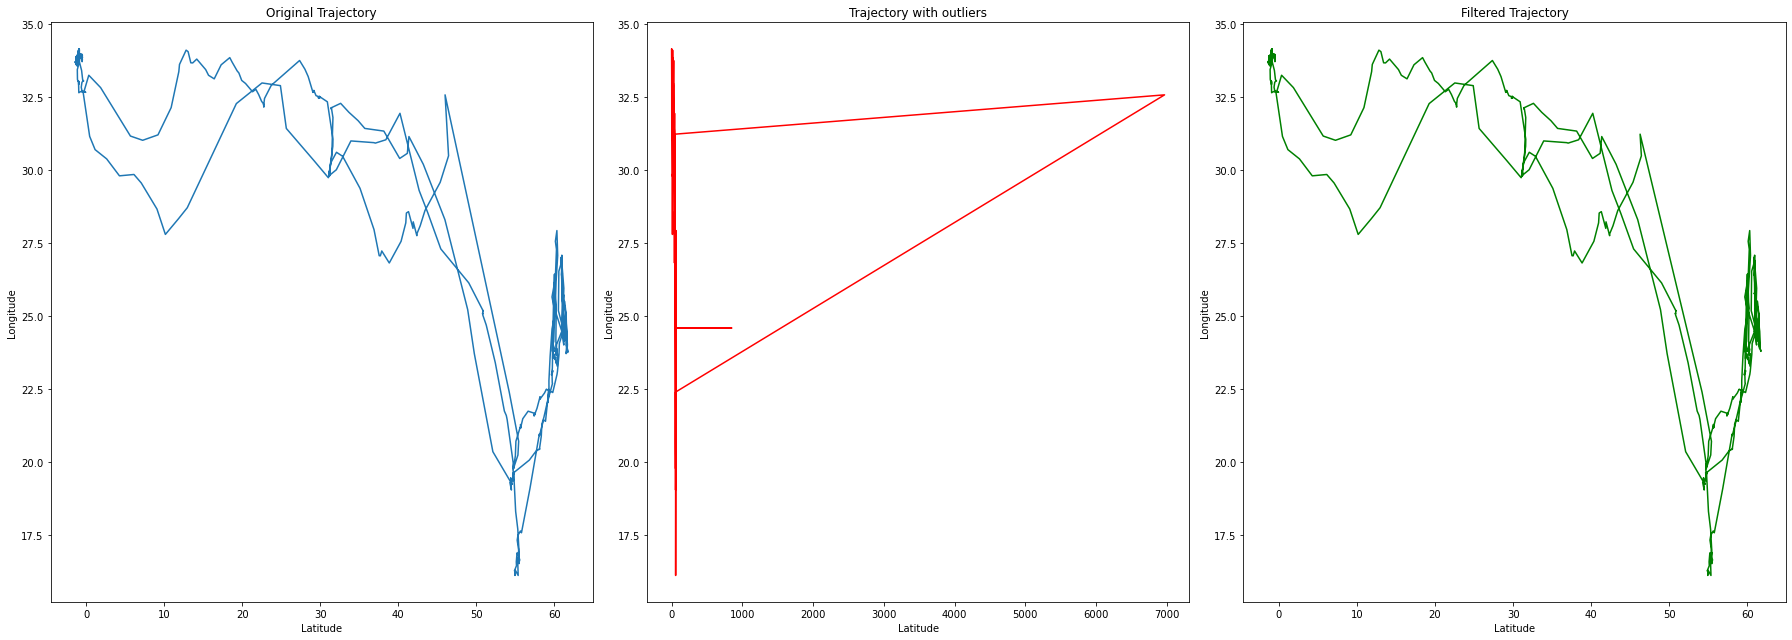

In [18]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(25, 9))
ax= ax.flatten()

# Plot the original trajectory.
ax[0].plot(small_gulls[const.LAT], small_gulls[const.LONG])
ax[0].set_title("Original Trajectory")
ax[0].set_xlabel("Latitude")
ax[0].set_ylabel("Longitude")

# Plot trajectory with outliers.
ax[1].plot(df[const.LAT], df[const.LONG], color='red')
ax[1].set_title("Trajectory with outliers")
ax[1].set_xlabel("Latitude")
ax[1].set_ylabel("Longitude")

# Plot the filtered trajectory.
ax[2].plot(small_filt_df[const.LAT], small_filt_df[const.LONG], color='green')
ax[2].set_title("Filtered Trajectory")
ax[2].set_xlabel("Latitude")
ax[2].set_ylabel("Longitude")

fig.tight_layout()